 ## Set up

In [1]:
from lib.networks import get_multiindex
import networkx as nx
import pandas as pd
import seaborn as sns

import config
from config import LEVELS, sm, with_sm, no_sm, with_unique_sm, GRAPHS_PATH
from lib.graph_database_access import get_participants, get_components, get_pathways
from lib.networks import get_multiindex
from lib.networks import get_or_create_interaction_network, print_interactome_details, get_sizes

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

config.set_root_wd()

Working directory: c:\git\pathwayanalysisplatform\proteoformnetworks


In [2]:
# Genes:
# Pathway, Reaction, Entity, Name, Type, Id, Database, Role

# Proteins:
# Pathway, Reaction, Entity, Name, Type, Id, PrevId, Database, Role

# Proteoforms:
# Pathway, Reaction, Entity, Name, Type, Id, PrevId, Database, Role

# Small molecules:
# Pathway, Reaction, Entity, Name, Type, Id, Database, Role

participant_records = { l: get_participants(l, GRAPHS_PATH) for l in LEVELS}
participant_records[sm] = get_participants(sm, GRAPHS_PATH)

for level in [*LEVELS, sm]:
    participant_records

In [3]:
# Genes:
# Complex, Entity, Name, Type, Id

# Proteins:
# Complex, Entity, Name, Type, Id, PrevId

# Proteoforms:
# Complex, Entity, Name, Type, Id, PrevId

# Small molecules:
# Complex, Entity, Name, Type, Id

components_records = { l: get_components(l, GRAPHS_PATH) for l in LEVELS}
components_records[sm] = get_components(sm, GRAPHS_PATH)

components_records

{'genes':         Unnamed: 0        Complex         Entity          Name  \
 0                0  R-HSA-1006173   R-HSA-976788           CFH   
 1                1  R-HSA-1008206  R-HSA-1008221          NFE2   
 2                2  R-HSA-1008206  R-HSA-1008261          MAFF   
 3                3  R-HSA-1008206  R-HSA-1008212          MAFG   
 4                4  R-HSA-1008206  R-HSA-1008242          MAFK   
 ...            ...            ...            ...           ...   
 108399      108399   R-NUL-997399   R-HSA-879433         S100B   
 108400      108400   R-NUL-997399   R-HSA-976740  APP(672-711)   
 108401      108401   R-NUL-997399   R-HSA-879382         HMGB1   
 108402      108402   R-NUL-997399  R-HSA-2457833  SAA1(19-122)   
 108403      108403   R-NUL-997399   R-HSA-197639          AGER   
 
                                  Type     Id  
 0       EntityWithAccessionedSequence    CFH  
 1       EntityWithAccessionedSequence   NFE2  
 2       EntityWithAccessionedSequence   

In [4]:
interactomes_no_sm = { l: get_or_create_interaction_network(l, no_sm, participant_records, components_records, GRAPHS_PATH) for l in LEVELS}
for level, interactome in interactomes_no_sm.items():
     print_interactome_details(interactome)

Graph for genes 
Graph edges: 453137
Graph nodes: 10968
Graph genes nodes: 10968
Graph small molecule nodes: 0

***********************


Graph for proteins 
Graph edges: 462430
Graph nodes: 11066
Graph proteins nodes: 11066
Graph small molecule nodes: 0

***********************


Graph for proteoforms 
Graph edges: 677057
Graph nodes: 14295
Graph proteoforms nodes: 14295
Graph small molecule nodes: 0

***********************




In [5]:
interactomes_with_sm = { l: get_or_create_interaction_network(l, with_sm, participant_records, components_records, GRAPHS_PATH) for l in LEVELS}
for level, interactome in interactomes_with_sm.items():
     print_interactome_details(interactome)

Graph for genes 
Graph edges: 528969
Graph nodes: 12933
Graph genes nodes: 10968
Graph small molecule nodes: 1965

***********************


Graph for proteins 
Graph edges: 538874
Graph nodes: 13031
Graph proteins nodes: 11066
Graph small molecule nodes: 1965

***********************


Graph for proteoforms 
Graph edges: 759198
Graph nodes: 16260
Graph proteoforms nodes: 14295
Graph small molecule nodes: 1965

***********************




In [6]:
interactomes_with_unique_sm = { l: get_or_create_interaction_network(l, with_unique_sm, participant_records, components_records, GRAPHS_PATH) for l in LEVELS}

for level, interactome in interactomes_with_unique_sm.items():
     print_interactome_details(interactome)


Graph for genes 
Graph edges: 839401
Graph nodes: 39078
Graph genes nodes: 10968
Graph small molecule nodes: 28110

***********************


Graph for proteins 
Graph edges: 853568
Graph nodes: 39176
Graph proteins nodes: 11066
Graph small molecule nodes: 28110

***********************


Graph for proteoforms 
Graph edges: 1077886
Graph nodes: 42405
Graph proteoforms nodes: 14295
Graph small molecule nodes: 28110

***********************




In [7]:
index = get_multiindex()
index

MultiIndex([(            'Not Included',       'genes'),
            (            'Not Included',    'proteins'),
            (            'Not Included', 'proteoforms'),
            (                'Included',       'genes'),
            (                'Included',    'proteins'),
            (                'Included', 'proteoforms'),
            ('Reaction-Unique Included',       'genes'),
            ('Reaction-Unique Included',    'proteins'),
            ('Reaction-Unique Included', 'proteoforms')],
           names=['Small Molecules', 'Entity Level'])

In [8]:
nums_no_sm = get_sizes(interactomes_no_sm)
nums_with_sm = get_sizes(interactomes_with_sm)
nums_with_unique_sm = get_sizes(interactomes_with_unique_sm)

In [9]:
df_sizes = pd.DataFrame({
    "Interactions": [*nums_no_sm[0], *nums_with_sm[0], *nums_with_unique_sm[0]],
    "Accessioned Entities": [*nums_no_sm[1], *nums_with_sm[1], *nums_with_unique_sm[1]],
    "Small Molecules": [*nums_no_sm[2], *nums_with_sm[2], *nums_with_unique_sm[2]]
}, index=index)
df_sizes.columns.name = "Sizes"
df_sizes

Sizes                                  Interactions  Accessioned Entities  \
Small Molecules          Entity Level                                       
Not Included             genes               453137                 10968   
                         proteins            462430                 11066   
                         proteoforms         677057                 14295   
Included                 genes               528969                 10968   
                         proteins            538874                 11066   
                         proteoforms         759198                 14295   
Reaction-Unique Included genes               839401                 10968   
                         proteins            853568                 11066   
                         proteoforms        1077886                 14295   

Sizes                                  Small Molecules  
Small Molecules          Entity Level                   
Not Included             genes                       0  
                         proteins                    0  
                         proteoforms                 0  
Included                 genes                    1965  
                         proteins                 1965  
                         proteoforms              1965  
Reaction-Unique Included genes                   28110  
                         proteins                28110  
                         proteoforms             28110

In [10]:
# Create a list with the number of genes, proteins, proteoforms, small molecules
num_nodes = [*df_sizes.loc[['Not Included']]["Accessioned Entities"], df_sizes.loc[['Included']]["Small Molecules"][0]]

# Create list with all levels:
node_types = [*LEVELS, "small molecules"]

# Create a list with the number of interactions without the small molecules
num_interactions_no_sm = df_sizes.loc[['Not Included']]["Interactions"]

num_interactions_with_sm = df_sizes.loc[['Included']]["Interactions"]

maxy = max([*num_interactions_with_sm, *num_interactions_no_sm])

maxy = 800000

<ipython-input-11-8991b48bd7fb>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot2.set_xticklabels(LEVELS, rotation=45)
<ipython-input-11-8991b48bd7fb>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot3.set_xticklabels(LEVELS, rotation=45)


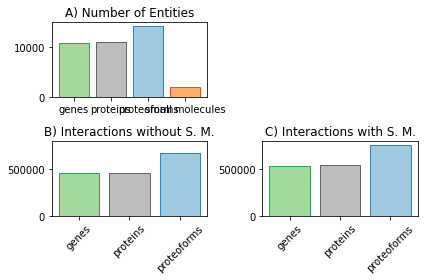

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from config import COLORS_BORDER

figure, axis = plt.subplots(1, 4)
# Placing the plots in the plane
plot1 = plt.subplot2grid((2, 2), (0, 0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((2, 2), (1, 0), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((2, 2), (1, 1), rowspan=1, colspan=1)

# Plot number of nodes
plot1.bar(node_types, num_nodes, color=config.COLORS_FILL, edgecolor=COLORS_BORDER)
plot1.set_title('A) Number of Entities')

plt.xticks(rotation=90)

# Plot number of interactions without small molecules
plot2.bar(LEVELS, num_interactions_no_sm, color=config.COLORS_FILL, edgecolor=COLORS_BORDER)
plot2.set_title('B) Interactions without S. M.')
plot2.set_ylim([0, maxy])
plot2.set_xticklabels(LEVELS, rotation=45)

# Plot number of interactions with small molecules
plot3.bar(LEVELS, num_interactions_with_sm, color=config.COLORS_FILL, edgecolor=COLORS_BORDER)
plot3.set_title('C) Interactions with S. M.')
plot3.set_ylim([0, maxy])
plot3.set_xticklabels(LEVELS, rotation=45)

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

figure.savefig('figures/figure_4.png')
plt.close()

In [12]:
interactomes = [*interactomes_no_sm.values(), *interactomes_with_sm.values(), *interactomes_with_unique_sm.values()]

degree_sequences = []
for interactome in interactomes:
    accessioned_nodes = [node for node,data in interactome.nodes(data=True) if not data['type'].startswith("Simple")]
    sequence = sorted([d for n, d in interactome.degree(accessioned_nodes)], reverse=True)
    degree_sequences.append(sequence)

degree_sequences = pd.Series([sorted(sequence, reverse=True) for sequence in degree_sequences], index=index)
degree_sequences

Small Molecules           Entity Level
Not Included              genes           [1241, 1218, 1057, 1057, 902, 892, 586, 578, 5...
                          proteins        [1242, 1219, 1058, 1058, 904, 894, 594, 578, 5...
                          proteoforms     [1469, 1444, 1279, 1279, 915, 898, 627, 619, 6...
Included                  genes           [1293, 1270, 1106, 1106, 1035, 1024, 638, 614,...
                          proteins        [1294, 1271, 1107, 1107, 1037, 1026, 638, 616,...
                          proteoforms     [1520, 1495, 1327, 1327, 1048, 1030, 743, 716,...
Reaction-Unique Included  genes           [1920, 1890, 1809, 1769, 1559, 1559, 1498, 148...
                          proteins        [1922, 1892, 1810, 1770, 1560, 1560, 1500, 148...
                          proteoforms     [2029, 1987, 1933, 1896, 1773, 1773, 1494, 148...
dtype: object

In [13]:
i = interactomes_no_sm["genes"]
df = pd.DataFrame(data=list(i.degree()), columns =['Node', 'Degree'])
df.sort_values(by=['Degree'], inplace=True)
df

,Node,Degree
5483,GPR35,0
4091,AOC3,0
4092,BPHL,0
4093,CMBL,0
4097,NQO2,0
...,...,...
1041,GNB1,902
62,UBB,1057
61,UBC,1057
63,UBA52,1218


In [14]:
print(f"(Genes, No SM) {interactomes_no_sm['genes'].degree['GPR35']}")
print(f"Neighbours: {[n for n in interactomes_no_sm['genes'].neighbors('GPR35')]}")
print(f"(Genes, With SM) {interactomes_with_sm['genes'].degree['GPR35']}")
print(f"Neighbours: {[n for n in interactomes_with_sm['genes'].neighbors('GPR35')]}")
print(f"(Genes, With Unique SM) {interactomes_with_unique_sm['genes'].degree['GPR35']}")
print(f"Neighbours: {[n for n in interactomes_with_unique_sm['genes'].neighbors('GPR35')]}")


(Genes, No SM) 0
Neighbours: []
(Genes, With SM) 1
Neighbours: ['sm_Kynurenic_acid']
(Genes, With Unique SM) 2
Neighbours: ['sm_R-HSA-6805205_Kynurenic_acid', 'sm_R-HSA-6805208_Kynurenic_acid']


In [15]:
mins = pd.Series([min(degree_sequence) for degree_sequence in degree_sequences], index=index)
maxs = pd.Series([max(degree_sequence) for degree_sequence in degree_sequences], index=index)
avgs = pd.Series([sum(degree_sequence)/len(degree_sequence) for degree_sequence in degree_sequences], index=index)

df_degrees = pd.DataFrame({"Min": mins, "Max": maxs, "Avg": avgs}, index=index)
df_degrees


Min   Max    Avg
Small Molecules          Entity Level                  
Not Included             genes           0  1241  82.63
                         proteins        0  1242  83.58
                         proteoforms     0  1469  94.73
Included                 genes           0  1293  88.31
                         proteins        0  1294  89.26
                         proteoforms     0  1520  99.53
Reaction-Unique Included genes           0  1920 112.64
                         proteins        0  1922 113.77
                         proteoforms     0  2029 118.77

In [16]:
df_seq = pd.DataFrame({"Sequence": degree_sequences})
df_seq.reset_index(inplace=True)
lst_col = 'Sequence'

df_seq = pd.DataFrame({
      col:np.repeat(df_seq[col].values, df_seq[lst_col].str.len())
      for col in df_seq.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(df_seq[lst_col].values)})[df_seq.columns]

df_seq = df_seq.rename(columns={'Sequence': 'Degree'})
df_seq['Degree'] = df_seq['Degree'].apply(lambda x: 0 if x == 0 else np.log10(x))

df_seq

,Small Molecules,Entity Level,Degree
0,Not Included,genes,3.09
1,Not Included,genes,3.09
2,Not Included,genes,3.02
3,Not Included,genes,3.02
4,Not Included,genes,2.96
...,...,...,...
108982,Reaction-Unique Included,proteoforms,0.00
108983,Reaction-Unique Included,proteoforms,0.00
108984,Reaction-Unique Included,proteoforms,0.00
108985,Reaction-Unique Included,proteoforms,0.00


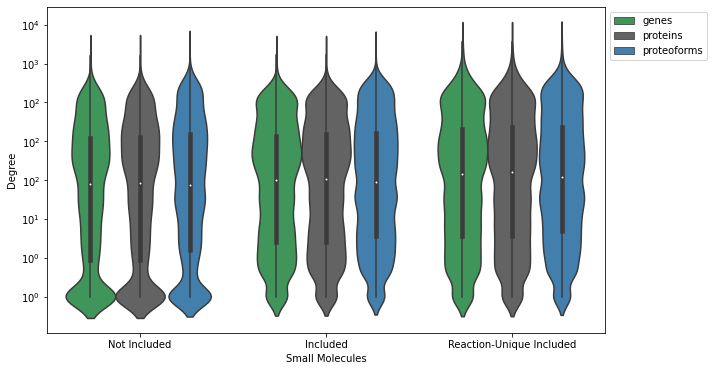

In [17]:
from matplotlib import ticker as mticker

fig, ax = plt.subplots(1, 1, figsize=(5, 6))
fig.set_size_inches(10, 6)
fig5 = sns.violinplot(x="Small Molecules", y="Degree", hue="Entity Level", data=df_seq, palette=config.COLORS_BORDER)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$")) # Convert ticks to powers of 10
plt.legend(bbox_to_anchor=(1.0, 1),borderaxespad=0.5) # Put the legend out of the figure
plt.show()
fig5.figure.savefig('figures/figure_5.png')



## Articulation points and bridges

- [X] Get bridges and articulation points for all pathways
- [ ] Calculate changes across the 3 levels with small molecules and with unique small molecules
- [ ] Plot the top 5 with most changes

In [22]:
df_br_ap = pd.DataFrame({
    "Articulation Points": [len(list(nx.articulation_points(i))) for i in interactomes],
    "Bridges": [len(list(nx.bridges(i))) for i in interactomes]},
    index=index)
df_br_ap.columns.name = "Entity Type"

df_br_ap

Entity Type                            Articulation Points  Bridges
Small Molecules          Entity Level                              
Not Included             genes                         269      515
                         proteins                      270      517
                         proteoforms                   349      580
Included                 genes                         246      524
                         proteins                      246      524
                         proteoforms                   255      524
Reaction-Unique Included genes                        1889     3367
                         proteins                     1888     3365
                         proteoforms                  1919     3280

In [23]:
df_br_ap["Articulation Points"].unstack()

Entity Level,genes,proteins,proteoforms
Small Molecules,,,
Included,246,246,255
Not Included,269,270,349
Reaction-Unique Included,1889,1888,1919


<AxesSubplot:title={'center':'Articulation Points'}, xlabel='Small Molecules'>

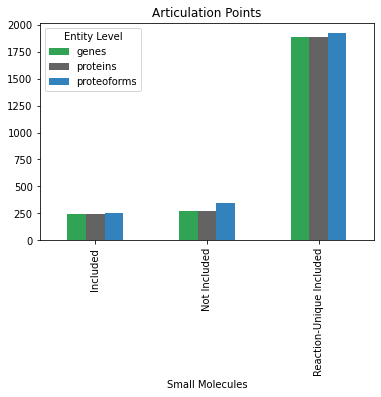

In [24]:
df_br_ap["Articulation Points"].unstack().plot(kind='bar', stacked=False, color=COLORS_BORDER, title="Articulation Points")

In [25]:
df_br_ap["Bridges"].unstack()

Entity Level,genes,proteins,proteoforms
Small Molecules,,,
Included,524,524,524
Not Included,515,517,580
Reaction-Unique Included,3367,3365,3280


<AxesSubplot:title={'center':'Bridges'}, xlabel='Small Molecules'>

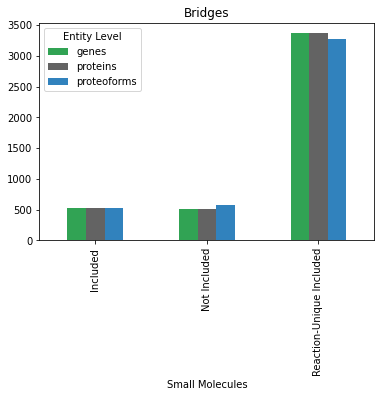

In [26]:
df_br_ap["Bridges"].unstack().plot(kind='bar', stacked=False, color=COLORS_BORDER, title="Bridges")


In [27]:
from lib.networks import create_pathway_interaction_networks

# Create all pathway networks
# Sets each node as node as articulation points or not
# Sets each edge as bridge or not
df_pathways = get_pathways()
#for pathway in df_pathways["stId"]:
#    create_pathway_interaction_networks(pathway, "resources/pathway_networks/")
df_pathways

,stId,displayName
0,R-HSA-9613829,Chaperone Mediated Autophagy
1,R-HSA-1632852,Macroautophagy
2,R-HSA-5205685,PINK1-PRKN Mediated Mitophagy
3,R-HSA-8934903,Receptor Mediated Mitophagy
4,R-HSA-9613354,Lipophagy
...,...,...
2060,R-HSA-432722,Golgi Associated Vesicle Biogenesis
2061,R-HSA-432720,Lysosome Vesicle Biogenesis
2062,R-HSA-8856828,Clathrin-mediated endocytosis
2063,R-HSA-8856825,Cargo recognition for clathrin-mediated endocy...


In [28]:
from lib.networks import get_json_filename, create_pathway_interaction_network, read_graph, \
    update_json_file, set_articulation_points, set_num_articulation_points, set_bridges, set_num_bridges
from config import LEVELS, METHODS
from pathlib import Path

out_path = "resources/pathway_networks/"
art_points_sequences = []
bridge_sequences = []
for method in METHODS:
    for level in LEVELS:
        art_point_sequence = []
        bridge_sequence = []
        for pathway in df_pathways["stId"]:
            #print(f"Bridges for {pathway}")
            filename = get_json_filename(level, method, out_path, pathway)
            if not Path(filename).exists():
                create_pathway_interaction_network(pathway, level, method, out_path)
            G = read_graph(filename)

            set_articulation_points(G)
            set_num_articulation_points(G)
            art_points_ratio = G.graph['Articulation Points']/G.number_of_nodes() if G.number_of_nodes() > 0 else 0
            art_point_sequence.append(art_points_ratio)

            set_bridges(G)
            set_num_bridges(G)

            bridge_ratio = G.graph['Bridges']/G.number_of_edges() if G.number_of_edges() > 0 else 0
            bridge_sequence.append(bridge_ratio)

            update_json_file(G, level, method, out_path, pathway)
        art_points_sequences.append(sorted(art_point_sequence))
        bridge_sequences.append(sorted(bridge_sequence))

art_points_sequences = pd.Series([sorted(sequence, reverse=True) for sequence in art_points_sequences], index=index)
art_points_sequences

Small Molecules           Entity Level
Not Included              genes           [0.3333333333333333, 0.3333333333333333, 0.333...
                          proteins        [0.3333333333333333, 0.3333333333333333, 0.333...
                          proteoforms     [0.5, 0.4444444444444444, 0.4, 0.4, 0.4, 0.4, ...
Included                  genes           [0.5, 0.3333333333333333, 0.3333333333333333, ...
                          proteins        [0.5, 0.3333333333333333, 0.3333333333333333, ...
                          proteoforms     [0.5, 0.4, 0.3333333333333333, 0.3333333333333...
Reaction-Unique Included  genes           [0.5, 0.42857142857142855, 0.4, 0.333333333333...
                          proteins        [0.5, 0.42857142857142855, 0.4, 0.333333333333...
                          proteoforms     [0.5, 0.42857142857142855, 0.4, 0.4, 0.375, 0....
dtype: object

In [29]:
bridge_sequences = pd.Series([sorted(sequence, reverse=True) for sequence in bridge_sequences], index=index)
bridge_sequences

Small Molecules           Entity Level
Not Included              genes           [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
                          proteins        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
                          proteoforms     [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
Included                  genes           [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
                          proteins        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
                          proteoforms     [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
Reaction-Unique Included  genes           [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
                          proteins        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
                          proteoforms     [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
dtype: object

In [30]:
mins = pd.Series([min(art_points_sequence) for art_points_sequence in art_points_sequences], index=index)
maxs = pd.Series([max(art_points_sequence) for art_points_sequence in art_points_sequences], index=index)
avgs = pd.Series([sum(art_points_sequence)/len(art_points_sequence) for art_points_sequence in art_points_sequences], index=index)

df_art_points = pd.DataFrame({"Min": mins, "Max": maxs, "Avg": avgs}, index=index)
df_art_points.index.name = "Articulation Points"
df_art_points

Min  Max  Avg
Small Molecules          Entity Level               
Not Included             genes        0.00 0.33 0.02
                         proteins     0.00 0.33 0.02
                         proteoforms  0.00 0.50 0.03
Included                 genes        0.00 0.50 0.03
                         proteins     0.00 0.50 0.03
                         proteoforms  0.00 0.50 0.03
Reaction-Unique Included genes        0.00 0.50 0.04
                         proteins     0.00 0.50 0.04
                         proteoforms  0.00 0.50 0.03

In [31]:
mins = pd.Series([min(bridge_sequence) for bridge_sequence in bridge_sequences], index=index)
maxs = pd.Series([max(bridge_sequence) for bridge_sequence in bridge_sequences], index=index)
avgs = pd.Series([sum(bridge_sequence)/len(bridge_sequence) for bridge_sequence in bridge_sequences], index=index)

df_bridges = pd.DataFrame({"Min": mins, "Max": maxs, "Avg": avgs}, index=index)
df_bridges.index.name = "Bridges"
df_bridges

Min  Max  Avg
Small Molecules          Entity Level               
Not Included             genes        0.00 1.00 0.10
                         proteins     0.00 1.00 0.10
                         proteoforms  0.00 1.00 0.10
Included                 genes        0.00 1.00 0.07
                         proteins     0.00 1.00 0.07
                         proteoforms  0.00 1.00 0.07
Reaction-Unique Included genes        0.00 1.00 0.08
                         proteins     0.00 1.00 0.08
                         proteoforms  0.00 1.00 0.08

In [32]:
df_art_points= pd.DataFrame({"Sequence": art_points_sequences})
df_art_points.reset_index(inplace=True)
lst_col = 'Sequence'

df_art_points = pd.DataFrame({
      col:np.repeat(df_art_points[col].values, df_art_points[lst_col].str.len())
      for col in df_art_points.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(df_art_points[lst_col].values)})[df_art_points.columns]

df_art_points = df_art_points.rename(columns={'Sequence': 'Articulation Points'})
#df_art_points['Articulation Points'] = df_art_points['Articulation Points'].apply(lambda x: 0 if x == 0 else np.log10(x))

df_art_points

,Small Molecules,Entity Level,Articulation Points
0,Not Included,genes,0.33
1,Not Included,genes,0.33
2,Not Included,genes,0.33
3,Not Included,genes,0.33
4,Not Included,genes,0.33
...,...,...,...
18580,Reaction-Unique Included,proteoforms,0.00
18581,Reaction-Unique Included,proteoforms,0.00
18582,Reaction-Unique Included,proteoforms,0.00
18583,Reaction-Unique Included,proteoforms,0.00


In [33]:
#tips = sns.load_dataset("tips")
#tips

In [34]:
#ax = sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3")

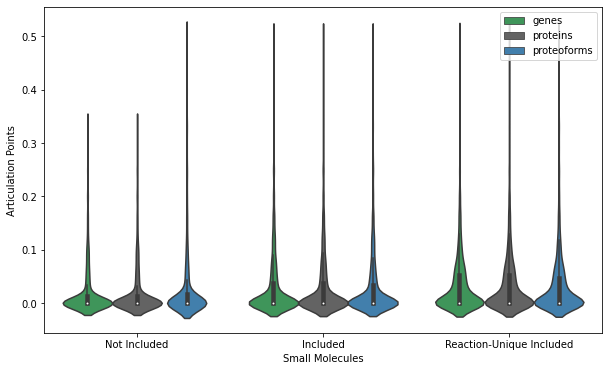

In [35]:
from matplotlib import ticker as mticker

fig, ax = plt.subplots(1, 1, figsize=(5, 6))
fig.set_size_inches(10, 6)
fig7 = sns.violinplot(x="Small Molecules", y="Articulation Points", hue="Entity Level", data=df_art_points, palette=config.COLORS_BORDER)
#ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$")) # Convert ticks to powers of 10
plt.legend(bbox_to_anchor=(1.0, 1),borderaxespad=0.5) # Put the legend out of the figure
plt.show()
fig7.figure.savefig('figures/figure_7.png')

In [36]:
df_bridges= pd.DataFrame({"Sequence": bridge_sequences})
df_bridges.reset_index(inplace=True)
lst_col = 'Sequence'

df_bridges = pd.DataFrame({
      col:np.repeat(df_bridges[col].values, df_bridges[lst_col].str.len())
      for col in df_bridges.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(df_bridges[lst_col].values)})[df_bridges.columns]

df_bridges = df_bridges.rename(columns={'Sequence': 'Bridges'})
#df_bridges['Bridges'] = df_bridges['Bridges'].apply(lambda x: 0 if x == 0 else np.log10(x))

df_bridges

,Small Molecules,Entity Level,Bridges
0,Not Included,genes,1.00
1,Not Included,genes,1.00
2,Not Included,genes,1.00
3,Not Included,genes,1.00
4,Not Included,genes,1.00
...,...,...,...
18580,Reaction-Unique Included,proteoforms,0.00
18581,Reaction-Unique Included,proteoforms,0.00
18582,Reaction-Unique Included,proteoforms,0.00
18583,Reaction-Unique Included,proteoforms,0.00


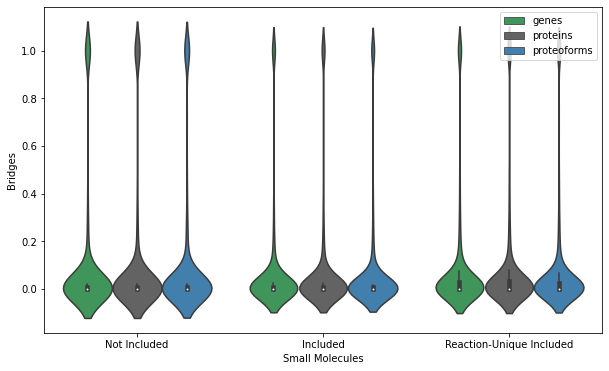

In [37]:
from matplotlib import ticker as mticker

fig, ax = plt.subplots(1, 1, figsize=(5, 6))
fig.set_size_inches(10, 6)
fig8 = sns.violinplot(x="Small Molecules", y="Bridges", hue="Entity Level", data=df_bridges, palette=config.COLORS_BORDER)
#ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$")) # Convert ticks to powers of 10
plt.legend(bbox_to_anchor=(1.0, 1),borderaxespad=0.5) # Put the legend out of the figure
plt.show()
fig8.figure.savefig('figures/figure_8.png')



In [38]:
# Normalize by size for both violin plots with respect to the number of edges